In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble,datasets
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
diabetes = datasets.load_diabetes()
X,y = diabetes.data,diabetes.target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [14]:
params = {
    'max_depth': 4,
    'loss': 'ls',
    'min_samples_split': 5,
    'n_estimators': 500,
    'learning_rate': 0.01
}

In [15]:
reg = ensemble.GradientBoostingRegressor(**params)

In [16]:
reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [17]:
mse = mean_squared_error(y_test,reg.predict(X_test))

In [18]:
print(mse)

2389.5679591850803


In [20]:
params['n_estimators']

500

In [21]:
test_score = np.zeros((params['n_estimators'],),dtype = 'float32')
test_score.shape

(500,)

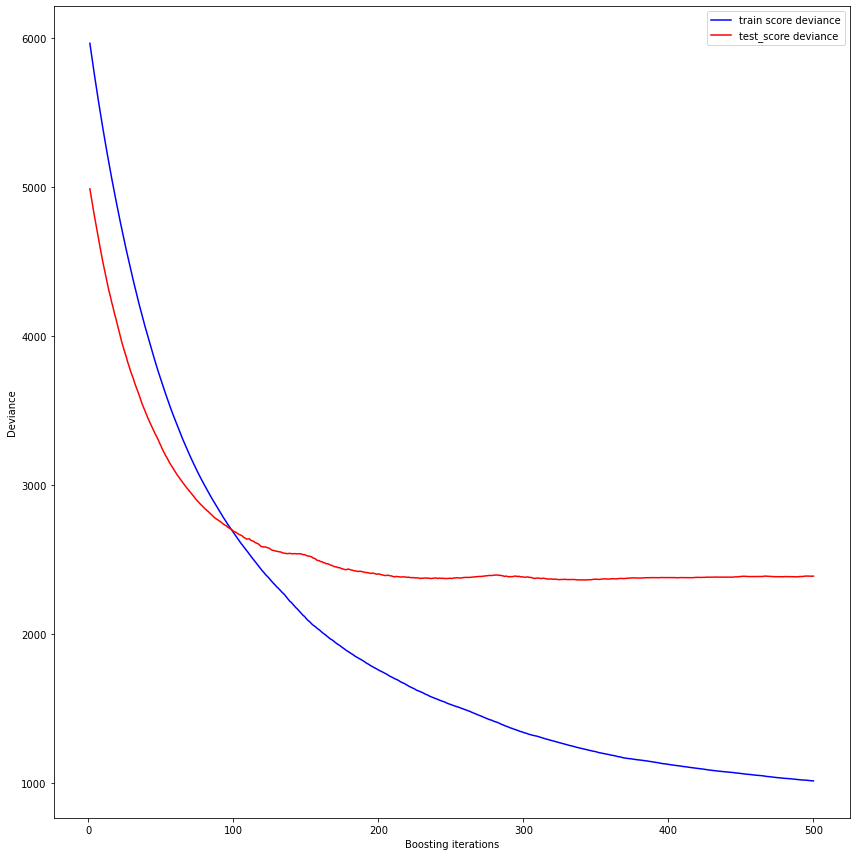

In [31]:
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test,y_pred)

_,ax = plt.subplots(figsize = (12,12))
ax.plot(np.arange(params['n_estimators'])+1,reg.train_score_,'b-',label = 'train score deviance')
ax.plot(np.arange(params['n_estimators'])+1,test_score,'r-',label = 'test_score deviance')
ax.legend(loc= 'upper right')
ax.set_xlabel("Boosting iterations")
ax.set_ylabel("Deviance")
plt.tight_layout()

In [32]:
reg = ensemble.GradientBoostingRegressor(**params)

In [33]:
reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [34]:
mse = mean_squared_error(y_test,reg.predict(X_test))

In [35]:
mse

2390.3787078965292

In [39]:
reg.train_score_.shape

(500,)

In [48]:
test_score = np.zeros((params['n_estimators'],),dtype = 'float64')
# test_score = np.zeros((params['n_estimators'],),dtype = 'float32')

In [49]:
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test,y_pred)
    

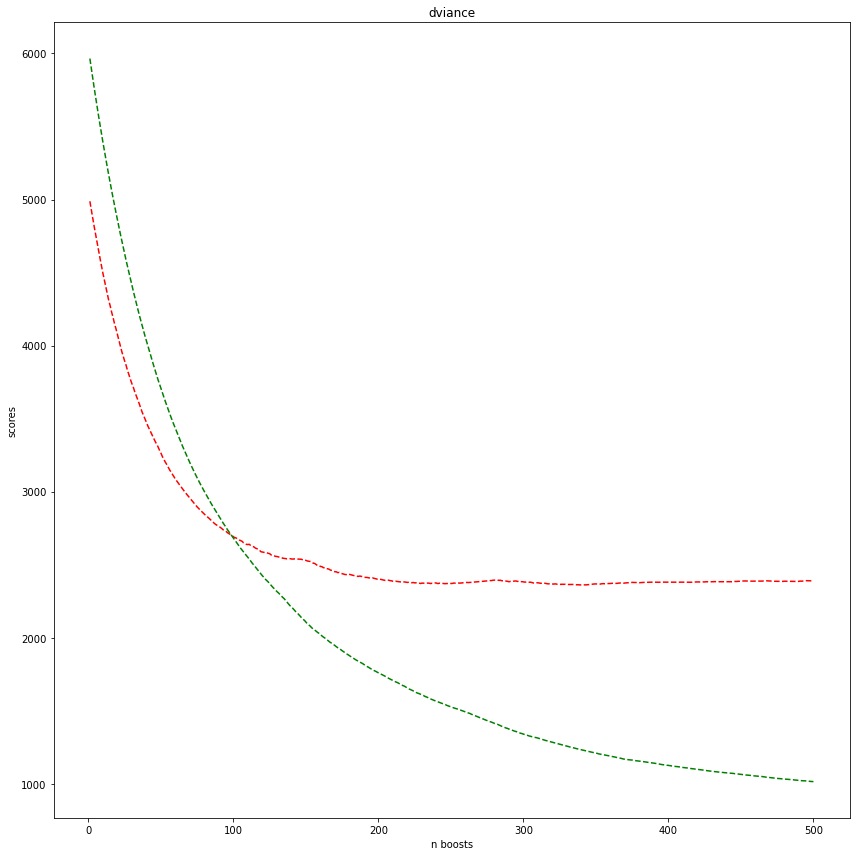

In [57]:
fig,ax =  plt.subplots(figsize = (12,12))
ax.plot(np.arange(params['n_estimators'])+1,test_score,'r--',label = 'test scores')
ax.plot(np.arange(params['n_estimators'])+1,reg.train_score_,'g--',label = 'train scores')
ax.set_title("dviance")
ax.set_xlabel("n boosts")
ax.set_ylabel("scores")
plt.tight_layout()
plt.show()